In [2]:
import numpy as np
import skimage.io
import matplotlib.pyplot as plt

In [76]:
# Primal-Dual Segmentation

T = 50
sigma = 1.0
tau   = 0.25
alpha = 1.0
theta = 1.0

im = skimage.io.imread('sheep.ppm', as_gray=True)[:,:] 

p = np.random.randn(im.shape[0], im.shape[1], 2) * 0.0

u = np.ones_like(im)
#u[-150:-50, -150:-50] = 0.0

u_tilde = u.copy()
plt.imsave('caca.png', u_tilde, cmap='gray')

results = [im
          ]

constant = (im-1.0)**2 - (im-0.0)**2


for i in range(T):
    dy, dx = np.gradient(u_tilde)
    grad = np.stack([dy, dx], axis=-1)

    gradient_step = p + sigma * grad
    denominator = np.maximum(1.0, np.linalg.norm(gradient_step, axis=2) / alpha)

    nextp = gradient_step / np.stack([denominator, denominator], axis=-1)

    
    divpy, _ = np.gradient(nextp[:,:,0])
    _, divpx = np.gradient(nextp[:,:,1])
    
    nextu = u - tau*(constant - (divpy+divpx))
    
    nextu_tilde = nextu + theta*(nextu - u)
   
    u = nextu
    p = nextp
    u_tilde = nextu_tilde
    
    results += [u_tilde]


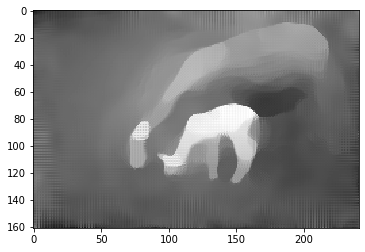

In [77]:
for i, r in enumerate(results):
    if (i%10==0 or True):
        plt.imshow(r, 'gray')
        skimage.io.imsave(str(i)+'seg.png', np.uint8(np.clip(r*255.0, 0.0, 255.0)))